# Random Forest Project Example

## Introduction

This project features data taken from LendingClub.com. Lending Club is an organization that helps people who are seeking loans to find out the best source of money for them. The borrowers take out loans for many different needs: education, debt consolidation, major purchases, small business, etc. The investors of this organization tasked Lending Club to create a profile of potential people who have a higher probability of paying off that loan. This dataset focuses on data from 2007 to 2010.

Model Selection: Random forests leverage the power of using numerous decision trees in order to make decisions-- a "forest" of decision trees. The forest is actually randomly creating decision trees nodes to calculate the output. The model then combines the output of all of the trees to generate the final output. This process is called ensemble learning. You need this when you have a very strong feature that highly predicts the outcome. Those highly correlated trees causes more model variance. I will test both methods and select the best model for our data.

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#globally suppresses scientific notation upon downloading the data file

In [10]:
loans = pd.read_csv('loan_data.csv')

In [11]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.11890,829.10000,11.35041,19.48000,737,5639.95833,28854,52.10000,0,0,0,0
1,1,credit_card,0.10710,228.22000,11.08214,14.29000,707,2760.00000,33623,76.70000,0,0,0,0
2,1,debt_consolidation,0.13570,366.86000,10.37349,11.63000,682,4710.00000,3511,25.60000,1,0,0,0
3,1,debt_consolidation,0.10080,162.34000,11.35041,8.10000,712,2699.95833,33667,73.20000,1,0,0,0
4,1,credit_card,0.14260,102.92000,11.29973,14.97000,667,4066.00000,4740,39.50000,0,1,0,0


In [12]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000,9578.00000
mean,0.80497,0.12264,319.08941,10.93212,12.60668,710.84631,4560.76720,16913.96388,46.79924,1.57747,0.16371,0.06212,0.16005
std,0.39624,0.02685,207.07130,0.61481,6.88397,37.97054,2496.93038,33756.18956,29.01442,2.20025,0.54621,0.26213,0.36668
min,0.00000,0.06000,15.67000,7.54750,0.00000,612.00000,178.95833,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.10390,163.77000,10.55841,7.21250,682.00000,2820.00000,3187.00000,22.60000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,0.12210,268.95000,10.92888,12.66500,707.00000,4139.95833,8596.00000,46.30000,1.00000,0.00000,0.00000,0.00000
75%,1.00000,0.14070,432.76250,11.29129,17.95000,737.00000,5730.00000,18249.50000,70.90000,2.00000,0.00000,0.00000,0.00000
max,1.00000,0.21640,940.14000,14.52835,29.96000,827.00000,17639.95833,1207359.00000,119.00000,33.00000,13.00000,5.00000,1.00000


In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

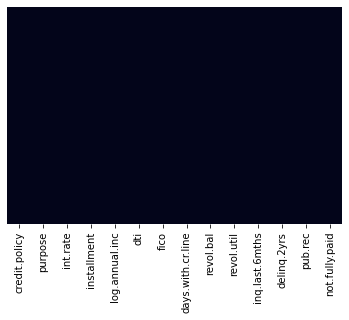

In [14]:
sns.heatmap(loans.isnull(),yticklabels=False,cbar=False)

We can see that the data seems to be free of major cleaning issues. We have full columns for all of our features with no null values. The black square above visuals that the data is free of missing values as null values would be a colored line. We can also see some descriptive data about our borrowers: 710 average credit score, an average of 12.5 years of a credit line, and a revolving balance of almost 17,000.

## Exploratory Data Analysis

Text(0.5, 0, 'FICO')

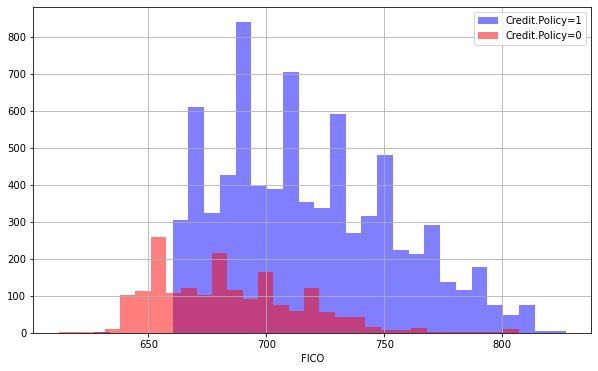

In [22]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

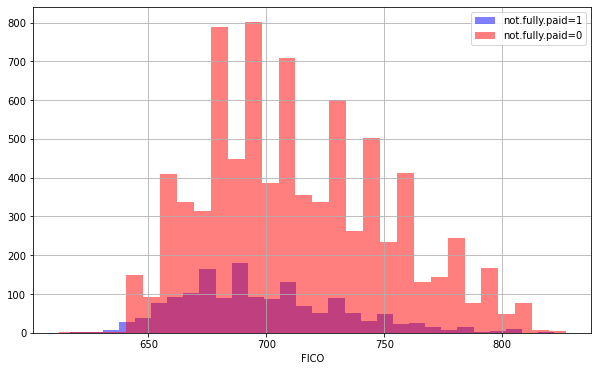

In [23]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

These two charts above both look at the interactions between different credit characteristics of the borrowers and their FICO credit score. The first charts looks at how their credit policy (1 means that the customer meets the credit underwriting criteria of LendingClub.com) and the credit score relate. We can see that people who meet that criteria have much higher scores on average than the people who do not meet that policy.

The second chart looks at the interaction between credit score and whether or not the borrower has fully paid off their loan. We can see that fewer people have paid off their loan and that the distribution of credit scores looks about the same overall.

<AxesSubplot:xlabel='purpose', ylabel='count'>

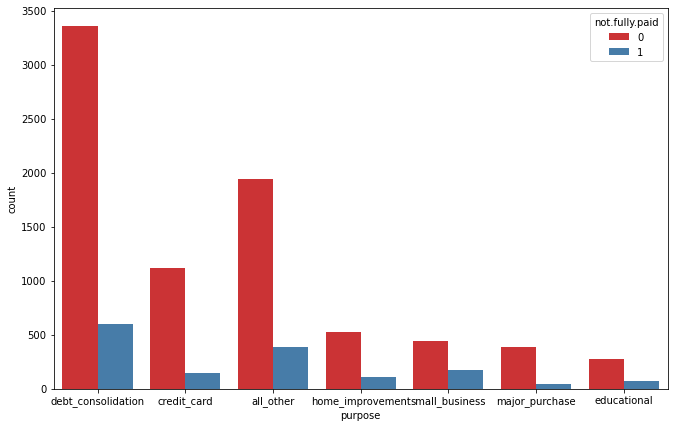

In [18]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

This chart shows us that most of the people who have not paid off their debt took out the loan for 'debt consolidation' reasons.

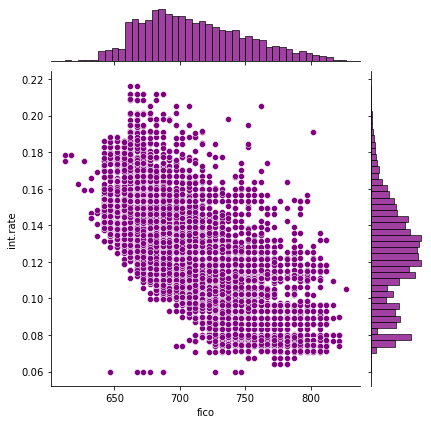

In [19]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

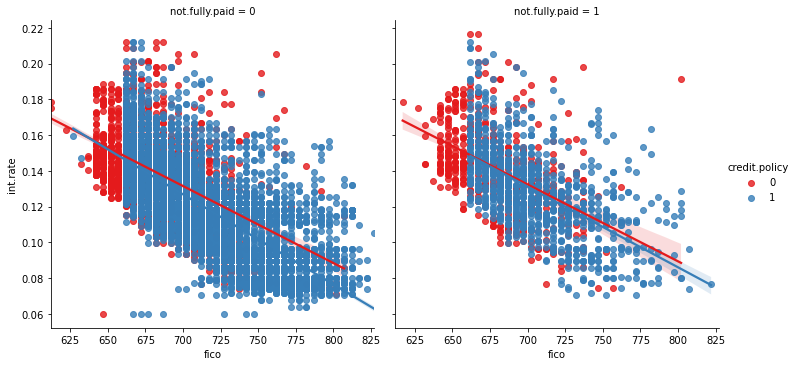

In [20]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

These charts focus on the interaction between credit score and interest rate. As expected, interest rates are negatively correlated with credit score. The final charts show that the same pattern between interest rates and credit score hold regardless of credit policy status. We see that the lower credit borrowers have a higher proportion of not being able to meet the credit policy as well.

## Setting Up the Data

In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Since we have a categorical feature that we would like to use, we need to create a dummy variable. We will focus on changing the 'purpose' column into the best format for our random forest and decision tree models.

In [25]:
cat_feats = ['purpose']

In [26]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Training, Testing, Splitting

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predications and Evaluation of a Decision Tree

In [45]:
predictions = dtree.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [48]:
print(confusion_matrix(y_test,predictions))

[[1986  445]
 [ 340  103]]


## Training the Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators=600)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predications and Evaluation

In [52]:
rfpredictions = rfc.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,rfpredictions))
#testing the random forest model

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [62]:
print(confusion_matrix(y_test,rfpredictions))
#testing the random forest model

[[2422    9]
 [ 434    9]]


In [56]:
print(classification_report(y_test,predictions))
#testing the decision tree model

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [57]:
print(confusion_matrix(y_test,predictions))
#testing the decision tree model

[[1986  445]
 [ 340  103]]


In [61]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Overall, these models did not provide strong support in creating a profile for lenders to help select the best candidates for borrowing money. Both models traded off in recall for each class prediction. Surprisingly, the decision tree model actually was able to better predict fully paying off the loan, but the random forest had fewer false negatives and false positives. More features and feature engineering of the remaining categorical variable could be helpful to this analysis. Another interesting point is that this dataset ranged from 2007-2010. This centers at the beginning and near end of the 2008 Recession. This could be a large reason why so few of the borrowers were able to fully pay off their loans. An updated dataset could also be a big factor in creating a lender profile. 